>[Using Python As a Calculator](#scrollTo=f4H-cT50D6Bj)

>[Python Libraries](#scrollTo=2p9x0uohC8vM)

>>[Exercise](#scrollTo=c-RcXnAINFrx)

>[A Quick Introduction to Pandas Dataframes](#scrollTo=PJYBOku3P37j)

>>[Basic Data Manipulation with Pandas](#scrollTo=nNj7z9WuVYeK)

>>>[1 Filter by Row](#scrollTo=nMZQTPrTWVBC)

>>>[2 Select columns](#scrollTo=2bWLqCFQXo7h)

>>>[3 Create a new column](#scrollTo=yHKkyYGkaz20)

>>>[4 Sort Columns](#scrollTo=W1rjd-6Yeyjh)

>>>[5 Group by](#scrollTo=Cmrct8tKgLII)



# Using Python As a Calculator

The python interpreter can be used as a calculator. Try out some examples below.

In [0]:
# this is a comment: Sum two numbers, raise a number to a power

# Python Libraries

The *python* distribution contains only a very basic set of tools of a common programming language. To enrich the language, one needs to install and load appropriate libraries. For example, if we want to compute the square root of a number, we need to load a library implementing such function. The same applies to using statistical functions, data manipulation, etc. Libraries in python are loaded using:
```python
import numpy as np
```
The most important libraries we will use duing this course are:
- numpy (typically as `np`): For numerical anlysis. See [manual](https://www.numpy.org/devdocs/contents.html).
- scipy: For scientific computing. See the [scipy lecture notes](http://scipy-lectures.org/index.html). We will extensively use the submodule `stats` of the scipy library for statistical modeling.
- pandas:   For data structuring and manipulation. See [documentation](http://pandas.pydata.org/pandas-docs/stable/) and [cheatsheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).
- matplotlib: For 2D plots. See [tutorials](https://matplotlib.org/tutorials/index.html).

## Exercise

Import numpy and compute the square root of a number. Have a look at the function documentation using:
```python
np.sqrt?
```

In [76]:
import numpy as np
x = 16
squareRoot = np.sqrt(x)
print("The SQRT of {0} is {1}".format(x, squareRoot) )

The SQRT of 16 is 4.0


In [0]:
np.sqrt?

# A Quick Introduction to Pandas Dataframes

Pandas is the main data structure and manipulation library of python. We will make extensive use of `pandas` during the course. You can think of a `pandas dataframe` as an excel spreadsheet, in which each row is associated to an observation and each column is representing a different feature, or attribute. For example, assume we want to store information about the students of this classroom. We might want to record the name, age, and gpa of each student. Let us create a dataframe, and store the data of a few students. **Note**: Do not forget to import the library before using it!

- Step 1:  Create a dataframe with 8 students, with the following:
>- names : A, B, C, D, E, F, G, H
>- ages: 21, 22, 23, 24, 25, 26, 27, 28
>- gpa: 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5

- Step 2: Get a description of the dataframe using `describe()`.
- Step 3: Create a scatter plot to describe the relation between age and gpa of students. Use `plot.` and press 'TAB' to get a list of plots.

In [0]:
import pandas as pd

In [0]:
myStudents = pd.DataFrame({
    'name' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'age'  : [21, 22, 23, 24, 25, 26, 27, 28],
    'gpa'  : [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]
})

In [29]:
myStudents.describe()

,age,gpa
count,8.00000,8.000000
mean,24.50000,5.750000
std,2.44949,1.224745
min,21.00000,4.000000
25%,22.75000,4.875000
50%,24.50000,5.750000
75%,26.25000,6.625000
max,28.00000,7.500000


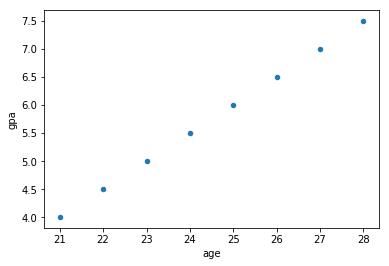

In [27]:

myStudents.plot.scatter('age', 'gpa');

Some useful functions to remember are:
* `describe()`: Summary statistics for each column of the dataset.
* `head()`: Print the first 5 rows of the dataset.
* `tail()`: Print the last 5 rows of the dataset.
* `dtypes`: Type of variable in each column.

## Basic Data Manipulation with Pandas

1. Filter rows (Slicing)
2. Select columns (Slicing)
3. Create a new column
4. Sort columns
5. Group by

###1 Filter by Row

Assume we want to select only students with age between 23 and 25 included.

In [37]:
myStudents[ (myStudents['age'] >= 23) & (myStudents['age']<=25) ]

,name,age,gpa
2,C,23,5.0
3,D,24,5.5
4,E,25,6.0


In [39]:
# if we want to use it, we need to store it somewhere (draw on blackboard what is happening)
students23to25 = myStudents[ (myStudents['age'] >= 23) & (myStudents['age']<=25) ]
students23to25

,name,age,gpa
2,C,23,5.0
3,D,24,5.5
4,E,25,6.0


###2 Select columns

Assume we do not need to keep track of the names, since we want to make the dataset anonymous. Let us create a second dataset which includes columns 'age' and 'gpa', but not 'name'. Verify what happens with the original dataframe. Can you combine `filtering` and `selecting` together?

In [62]:
# only columns
myStudents[ ['age', 'gpa'] ]

# filtering and selecting: rows and columns --> use `loc`
myStudents.loc[myStudents['age']>23, ['age', 'gpa']]

# what does `iloc` do?
myStudents.iloc[-1 , ]

name      H
age      28
gpa     7.5
Name: 7, dtype: object

In [55]:
pd.iloc?

Object `pd.iloc` not found.


###3 Create a new column

Assume we want to add a new column, recording the gender of students. For example, here it the gender of our 8 students:
- gender: m, m, f, f, m, m, m, f

In [74]:
myStudents['gender'] = ['m', 'm', 'f', 'f', 'm', 'm', 'm', 'f']
myStudents

,name,age,gpa,gender
0,A,21,4.0,m
1,B,22,4.5,m
2,C,23,5.0,f
3,D,24,5.5,f
4,E,25,6.0,m
5,F,26,6.5,m
6,G,27,7.0,m
7,H,28,7.5,f


Now, assume we want to create a new column *based on the value on an existing column*. For example, we want to assign a letter grade to students, with the following rule:
- gpa >= 7 --> letter grade A
- 5 <= gpa < 7 --> letter grade B
- gpa < 5 --> letter grade C

Have a look at `np.where()`.

In [82]:
myStudents['letter grade'] = np.where(myStudents['gpa'] < 5, 'C', 
                                      np.where(myStudents['gpa'] < 7, 'B', 'A'))
myStudents

,name,age,gpa,gender,letter grade
0,A,21,4.0,m,C
1,B,22,4.5,m,C
2,C,23,5.0,f,B
3,D,24,5.5,f,B
4,E,25,6.0,m,B
5,F,26,6.5,m,B
6,G,27,7.0,m,A
7,H,28,7.5,f,A


###4 Sort Columns

Assume we want to sort the dataframe with respect to the value of a given column. For example, we want to get the dataframe sorted with respect to the gpa, in decreasing order. Use `sort_value()`.

In [95]:
myStudents.sort_values(by=['gpa'], ascending=False)

# can you sort by gender and gpa?

,name,age,gpa,gender,letter grade
6,G,27,7.0,m,A
5,F,26,6.5,m,B
4,E,25,6.0,m,B
1,B,22,4.5,m,C
0,A,21,4.0,m,C
7,H,28,7.5,f,A
3,D,24,5.5,f,B
2,C,23,5.0,f,B


###5 Group by

The `groupby` function carries out a set of manipulations. For example, assume we want to know what is the average gpa of students, per gender (i.e., **groupped by** gender). What we would need to do is: (i) get all the observations of a given gender, say 'm'. This is a 'filter' operations; (ii) get the `gpa` column, a `select` operations; (iiI) compute the average, i.e., a summary statistic, for the reduced dataset. 

The `groupby()` function carries out the three operations, for every value of the column `gender`.

In [114]:
myStudents.groupby(by='gender').mean() # this gives the avg of each column
myStudents.groupby(by='gender')['gpa'].mean() # this gives the avg of column 'gpa'
myStudents.groupby(by='gender').describe() # try this one

# get only subgroup 'm'
myStudents.groupby(by='gender').get_group('m')

,name,age,gpa,gender,letter grade
0,A,21,4.0,m,C
1,B,22,4.5,m,C
4,E,25,6.0,m,B
5,F,26,6.5,m,B
6,G,27,7.0,m,A


## Input/Output with Pandas Dataframe

In general, we will get the data from different sources, e.g., a web site, an excel file, google drive, etc. Pandas comes with a number of functions to import and export dataset. Have a look at the function `read_csv()` to see how to import "comma separated values", which is the one of the most widely used format of datasets. Additional information can be found [here](http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [119]:
mydf = pd.read_csv()

NameError: ignored

## Exercise: California Housing

Import the California Housing dataset from [https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv) and address the following questions:

In [0]:
df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
df.describe()
df.to_csv("california_housing.csv")

In [124]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
